# Introduction

Fisher's Iris data set is a data set introduced by the British biologist Ronald Fisher in his 1936 paper. 
The data is comprised of the following:
1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width
5. Species

Reference: https://archive.ics.uci.edu/ml/datasets/iris

## 1. Get and load the data

Search online for Fisher’s iris data set, find a copy of the data, download it and save it to your repository. 
Using Jupyter notebook, load the CSV file into a numpy array.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.patches as mp
import seaborn as sb
from scipy import stats


#load sepal length & width (cols 0 & 1). Petal length & width (cols 2 & 3) into a numpy array.
sepLen, sepWid, petLen, petWid = np.genfromtxt('IRIS.csv', delimiter = ',', usecols = (0,1,2,3), unpack = True, dtype=float)
#load the names from column 4
species = np.genfromtxt('IRIS.csv', delimiter=',', usecols=4, unpack = True, dtype=str)

print("Sepal\t\t| Petal\t\t | Species")
print("length | widht\t| length | width | type")
for i in range(len(petWid)):
    print('{0:.1f} \t {1:.1f} \t {2:.1f} \t {3:.1f} \t {4:s}'.format(sepLen[i], sepWid[i], petLen[i], petWid[i], species[i]))



Sepal		| Petal		 | Species
length | widht	| length | width | type
5.2 	 3.5 	 1.4 	 0.2 	 I-setosa
4.9 	 3.0 	 1.4 	 0.2 	 I-setosa
4.7 	 3.2 	 1.3 	 0.2 	 I-setosa
4.6 	 3.1 	 1.5 	 0.2 	 I-setosa
5.0 	 3.6 	 1.4 	 0.3 	 I-setosa
5.4 	 3.9 	 1.7 	 0.4 	 I-setosa
4.6 	 3.4 	 1.4 	 0.3 	 I-setosa
5.0 	 3.4 	 1.5 	 0.2 	 I-setosa
4.4 	 2.9 	 1.4 	 0.2 	 I-setosa
4.9 	 3.1 	 1.5 	 0.1 	 I-setosa
5.4 	 3.7 	 1.5 	 0.2 	 I-setosa
4.8 	 3.4 	 1.6 	 0.2 	 I-setosa
4.8 	 3.0 	 1.4 	 0.1 	 I-setosa
4.3 	 3.0 	 1.1 	 0.1 	 I-setosa
5.8 	 4.0 	 1.2 	 0.2 	 I-setosa
5.7 	 4.4 	 1.5 	 0.4 	 I-setosa
5.4 	 3.9 	 1.3 	 0.4 	 I-setosa
5.1 	 3.5 	 1.4 	 0.3 	 I-setosa
5.7 	 3.8 	 1.7 	 0.3 	 I-setosa
5.1 	 3.8 	 1.5 	 0.3 	 I-setosa
5.4 	 3.4 	 1.7 	 0.2 	 I-setosa
5.1 	 3.7 	 1.5 	 0.4 	 I-setosa
4.6 	 3.6 	 1.0 	 0.2 	 I-setosa
5.1 	 3.3 	 1.7 	 0.5 	 I-setosa
4.8 	 3.4 	 1.9 	 0.2 	 I-setosa
5.0 	 3.0 	 1.6 	 0.2 	 I-setosa
5.0 	 3.4 	 1.6 	 0.4 	 I-setosa
5.2 	 3.5 	 1.5 	 0.2 	 I-setosa
5.2 	 3.4 

### 3. Create a simple plot

The dataset contains five variables: sepal length, sepal width, petal length, petal width, and species. Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis. Add axis labels and a title to the plot.

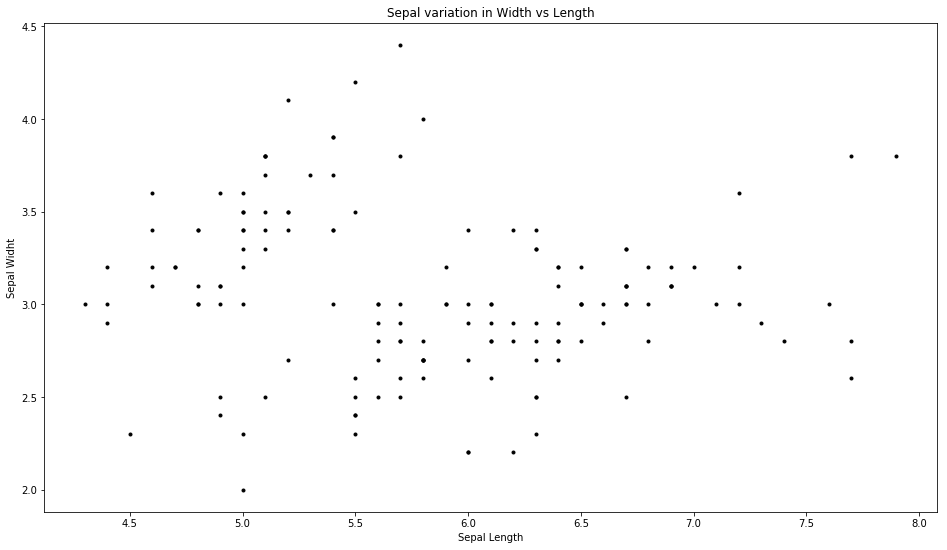

In [2]:
#creating a simple plot using the sepal data
pl.rcParams['figure.figsize'] = (16.0, 9.0)     # set dimensions of scatterplot
pl.plot(sepLen, sepWid, 'k.')                   # set plot points 
pl.ylabel('Sepal Widht')                        # set y label
pl.xlabel('Sepal Length')                       # set x label 
pl.title('Sepal variation in Width vs Length')  # give it a title

pl.show()                                       # draws the  scatterplot

### 4. Create a more complex plot

Re-create the above plot, but this time plot the setosa data points in red, the versicolor data point in green, and the virginica data points in blue. Setosa, versicolor, and virginica are the three possible values of the species variable. Add a legend to the plot showing which species is in which colour.

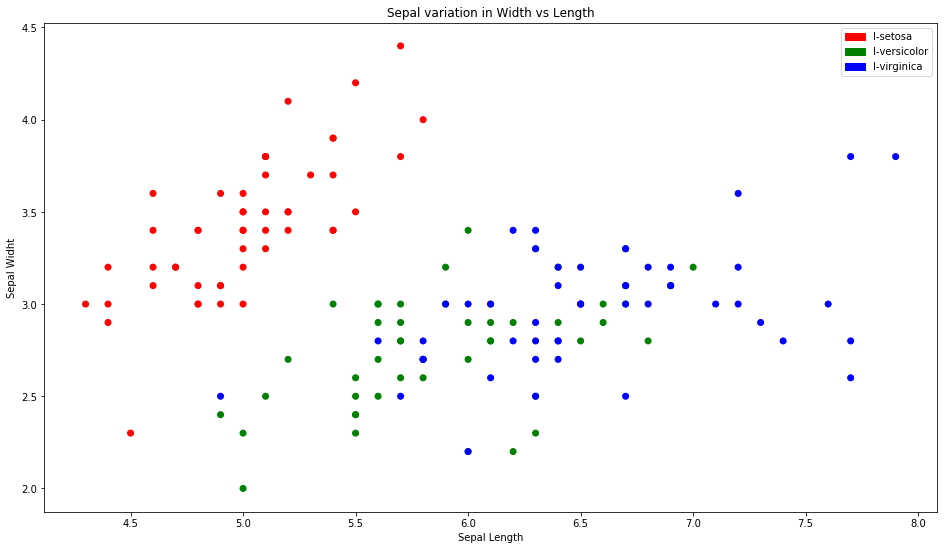

In [3]:
pl.rcParams['figure.figsize'] = (16.0, 9.0)     # set dimensions of a scatterplot
pl.ylabel('Sepal Widht')                        # set y label
pl.xlabel('Sepal Length')                       # set x label 
pl.title('Sepal variation in Width vs Length')  # give it a title

# create key, value pair dict to bind species to different colours
pairs={'I-setosa' :'r','I-versicolor' :'g','I-virginica' :'b'} 

pl.scatter(sepLen, sepWid, c=[pairs[i] for i in species], label=[pairs[i] for i in pairs])
labels = [mp.Patch(color=cl, label=la) for la, cl in pairs.items()]


pl.legend(handles = labels)
pl.show()

### 5. Use seaborn

Use the seaborn library to create a scatterplot matrix of all five variables.

Reference : http://seaborn.pydata.org/examples/scatterplot_matrix.html

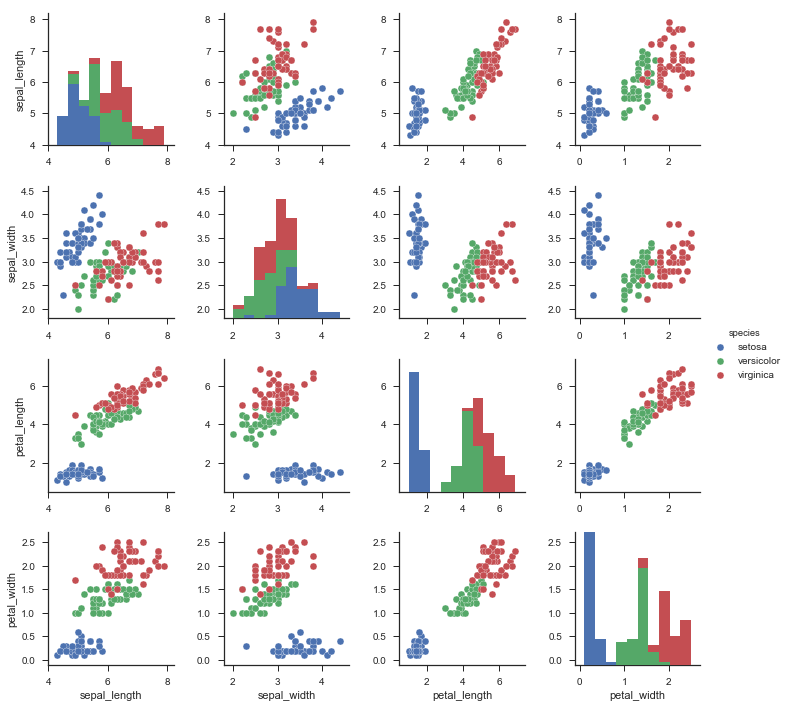

In [4]:
sb.set(style="ticks")                           # Set aesthetic parameters in one step.
df = sb.load_dataset("iris")                    # using the iris data set from seaborns github
sb.pairplot(df, hue="species")                  # Plot pairwise relationships in a dataset.  
pl.show()

### 6. Fit a line

Fit a straight line to the variables petal length and petal width for the whole data set. Plot the data points in a scatter plot with the best fit line shown.

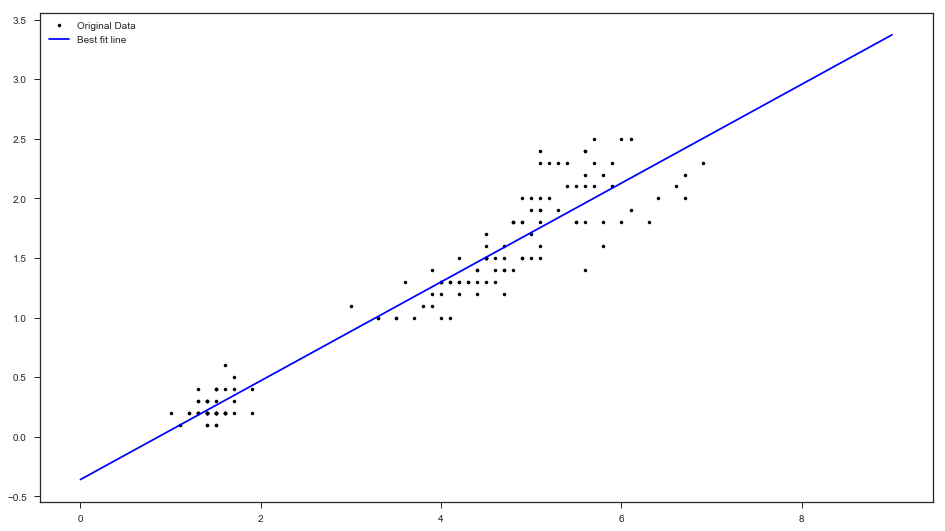

In [5]:
# get the best fit line function
def bestFitLine(length, Width):
    pl.rcParams['figure.figsize'] = (16.0, 9.0)     # set dimensions of a scatterplot

    j = np.linspace(0, 9, 1000)
    line = np.polyfit(length, Width, 1)            # Calculate the best fit line
    lp = line[0] * j + line[1]                      # Calculate the line points

    pl.plot(length, Width, 'k.', label = 'Original Data')       # plot the points
    pl.plot(j, lp, 'b-', label = 'Best fit line')                # add the line
    pl.legend()
    pl.show()

#best fit line for all
bestFitLine(petLen, petWid)

### 7. Calculate the R-squared value

Calculate the R-squared value for your line above.

Reference: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html

In [6]:
# calculate r squared for all
rSq = stats.linregress(petLen, petWid)
print('\nR Value: ', rSq[2], '\n Slope: ', rSq[0], '\t Intercept: ', rSq[1])


R Value:  0.962303734936 
 Slope:  0.41459243138 	 Intercept:  -0.358904293542


### 8. Fit another line

Use numpy to select only the data points where species is setosa. Fit a straight line to the variables petal length and petal width. Plot the data points in a scatter plot with the best fit line shown.

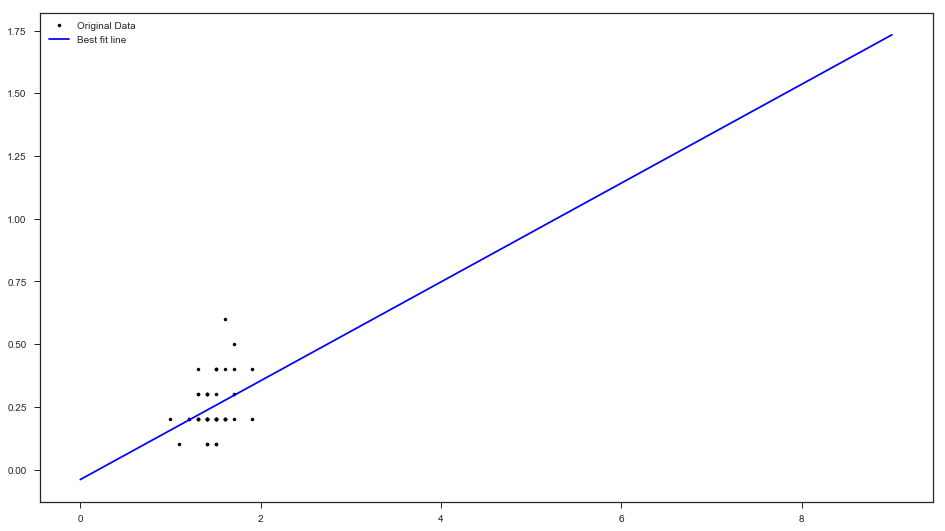

In [7]:
# best fit line for only setosa
newLen, newWid = petLen[0:50], petWid[0:50]

bestFitLine(newLen, newWid)

### 9. Calculate the R-squared value

Calculate the R-squared value for your line above.

In [8]:
# calculate r squared for setosa only
rSq = stats.linregress(newLen, newWid)
print('\nR Value: ', rSq[2], '\n Slope: ', rSq[0], '\t Intercept: ', rSq[1])


R Value:  0.324537577512 
 Slope:  0.197049668426 	 Intercept:  -0.0400866152389


### 10. Use gradient descent

Use gradient descent to approximate the best fit line for the petal length and petal width setosa values. Compare the outputs to your calculations above.

Reference: https://emerging-technologies.github.io/ -> gradient descent section

In [9]:
# Using gradient descent to approximate the best fit line for the petal length and petal width setosa values.
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(newLen, newWid, m, c)
  cnew = c - eta * grad_c(newLen, newWid, m, c)
  if m == mnew and c == cnew:
    change = False
    print("m: %20.16f  c: %20.16f" % (m, c))
  else:
    m, c = mnew, cnew
    #print("m: %20.16f  c: %20.16f" % (m, c))

m:   0.1970496684259747  c:  -0.0400866152387746


In [10]:
print('\n\n', rSq)
print('\nM difference in percentage: '+str(format((100 * (rSq[0] - m) / m), '.12f')))
print('C difference in percentage: '+str(format((100 * (rSq[1] - c) / c), '.12f')))



 LinregressResult(slope=0.19704966842603874, intercept=-0.040086615238868722, rvalue=0.32453757751213075, pvalue=0.021481618657813877, stderr=0.082893950649763098)

M difference in percentage: 0.000000000033
C difference in percentage: 0.000000000235


# End